In [31]:
import pandas as pd
df = pd.read_csv('../datasets/adult-census.csv')

In [2]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.tail(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum(axis=0)

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f'Numberical columns: {numerical_columns}')
print(f'Categorical columsn: {categorical_columns}')

Numberical columns: Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical columsn: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')


In [13]:
for col in categorical_columns: 
    df[col] = df[col].astype('category')
    print(f'-----Column {col}-----')
    print(f'Number of unique values: {df[col].unique().size}')
    print('Number of each values: ')
    print(df[col].value_counts())
    print('\n')


-----Column workclass-----
Number of unique values: 9
Number of each values: 
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


-----Column education-----
Number of unique values: 16
Number of each values: 
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


-----Column marital-status-----
Number of unique values: 7
Number of each values: 
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced             

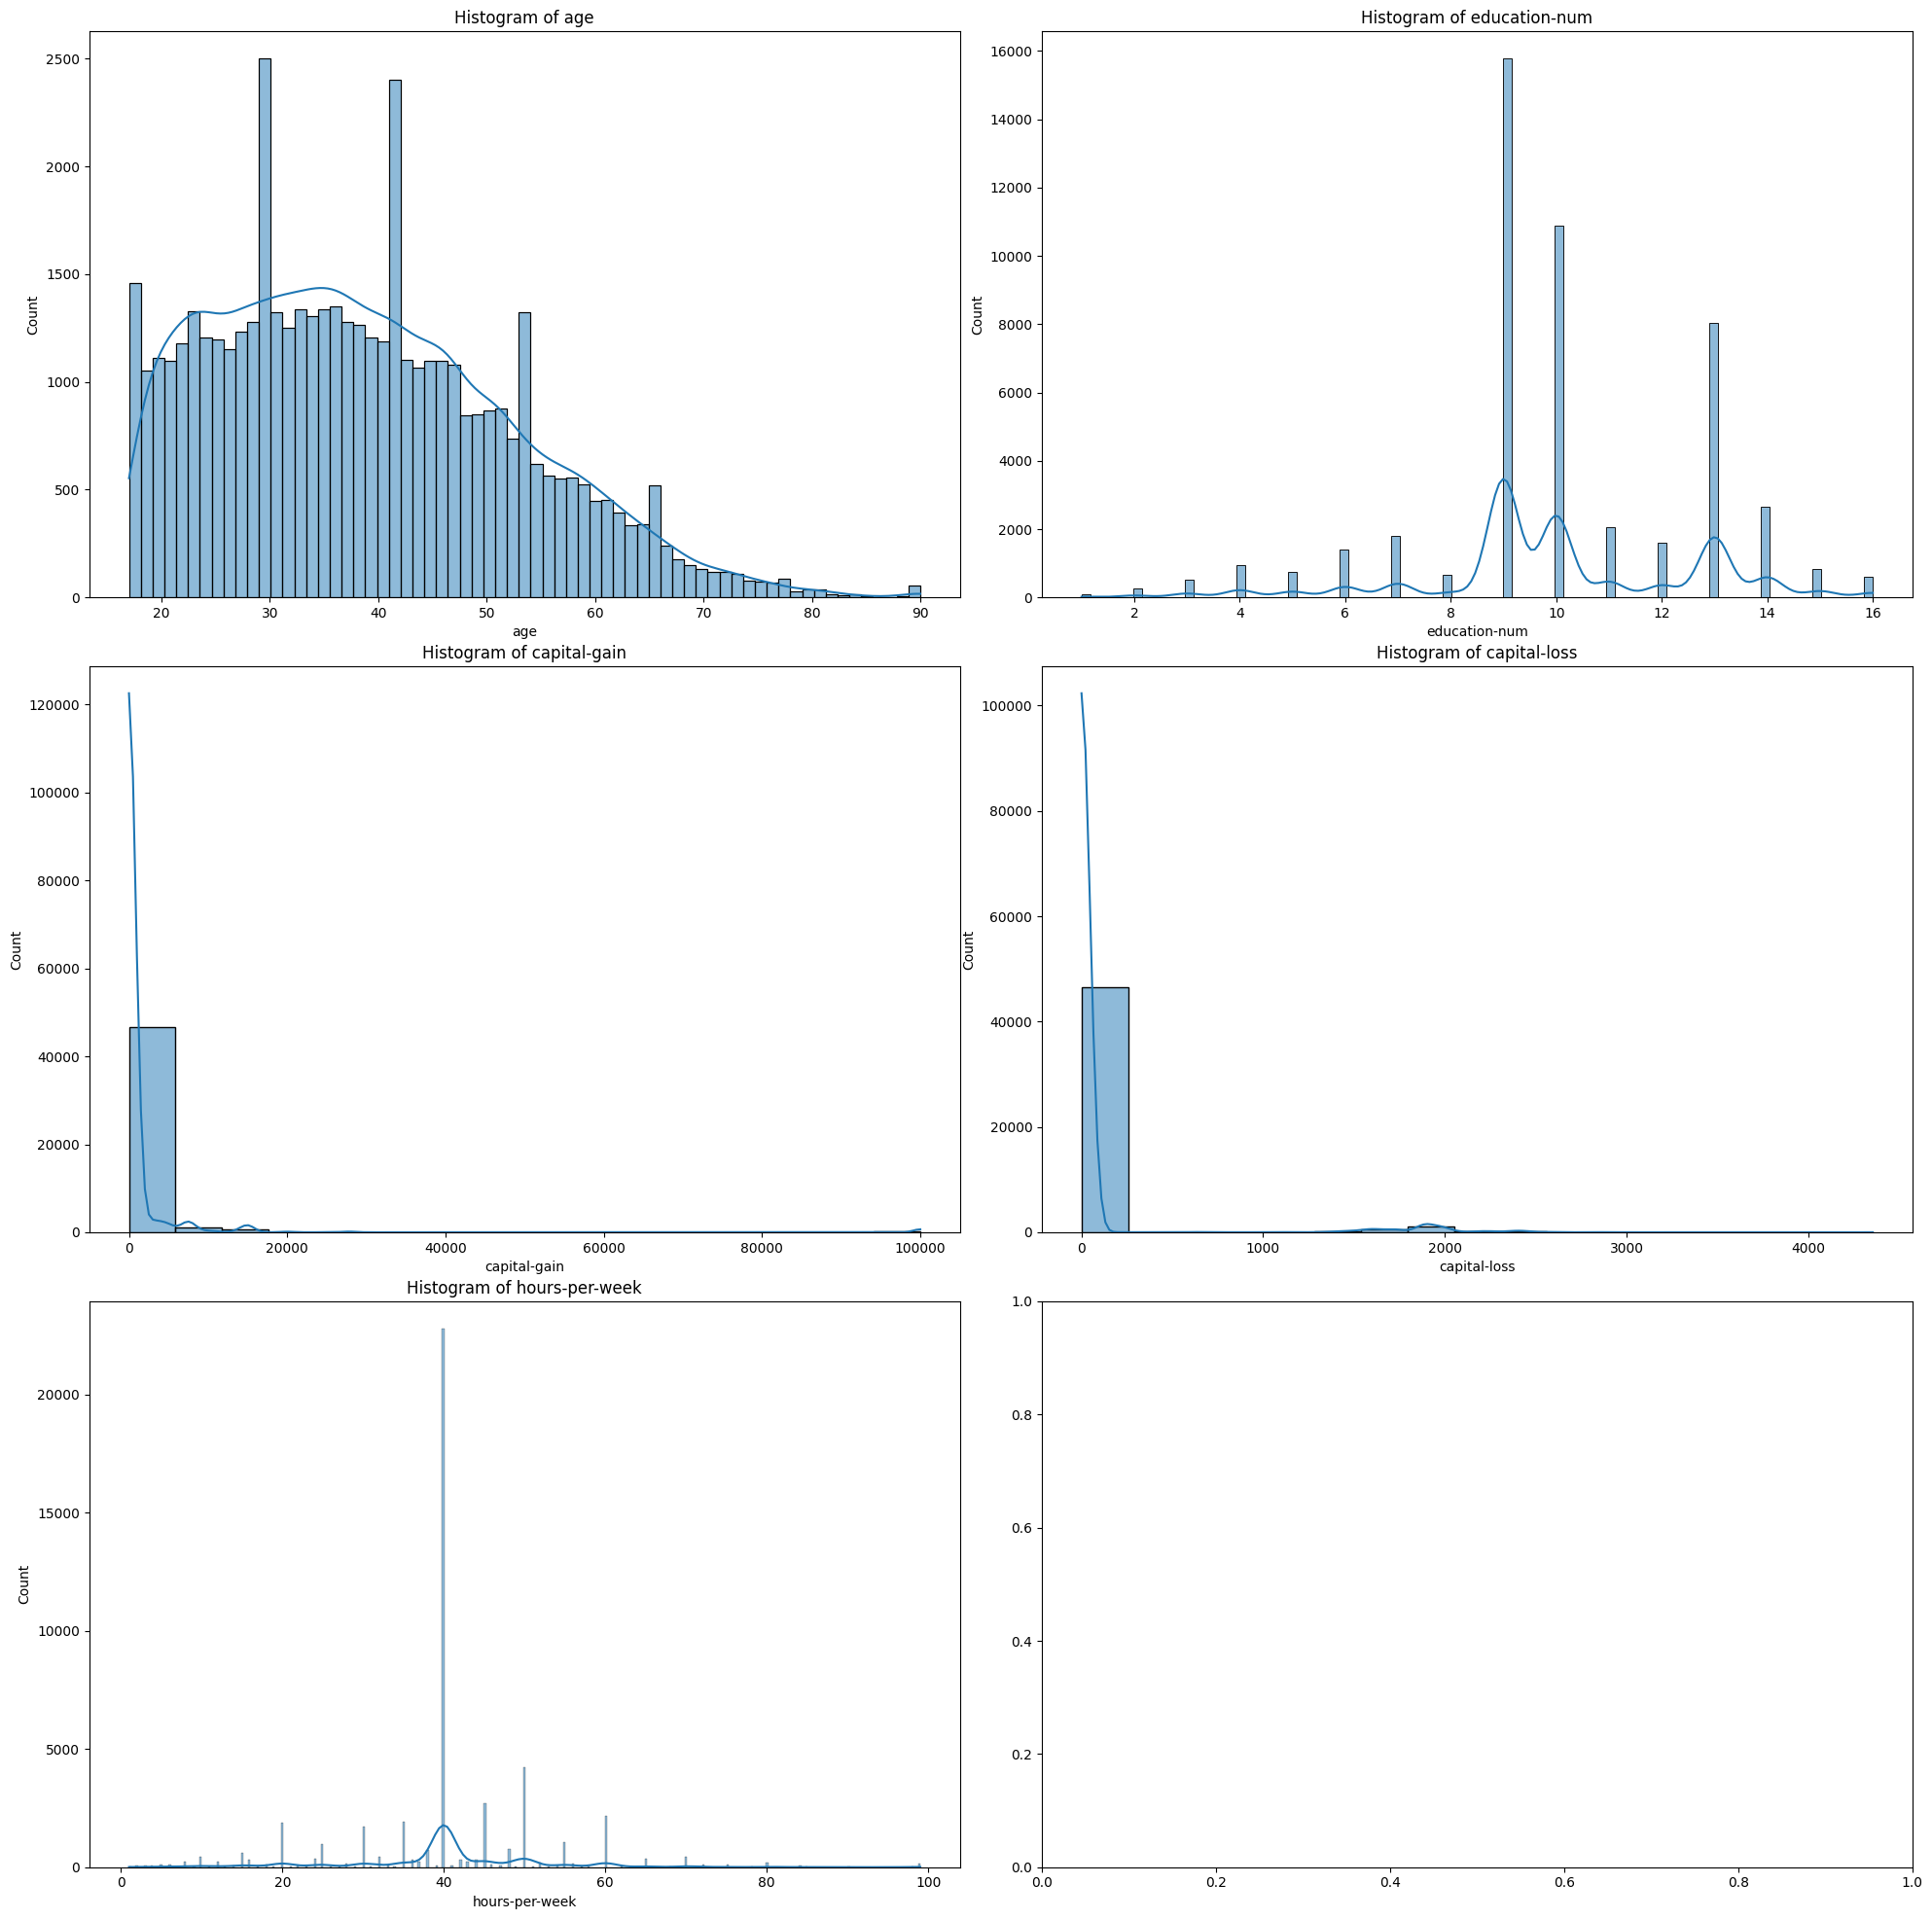

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(20, 20))
columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
fig.tight_layout(pad=3.0)

for i in range(3):
    for j in range(2):
        if i != 2 or j != 1:
           col = columns[i*2+j]
           axs[i][j].set_title(f'Histogram of {col}')
           sns.histplot(data=df, x=col, ax=axs[i][j], kde=True)
           

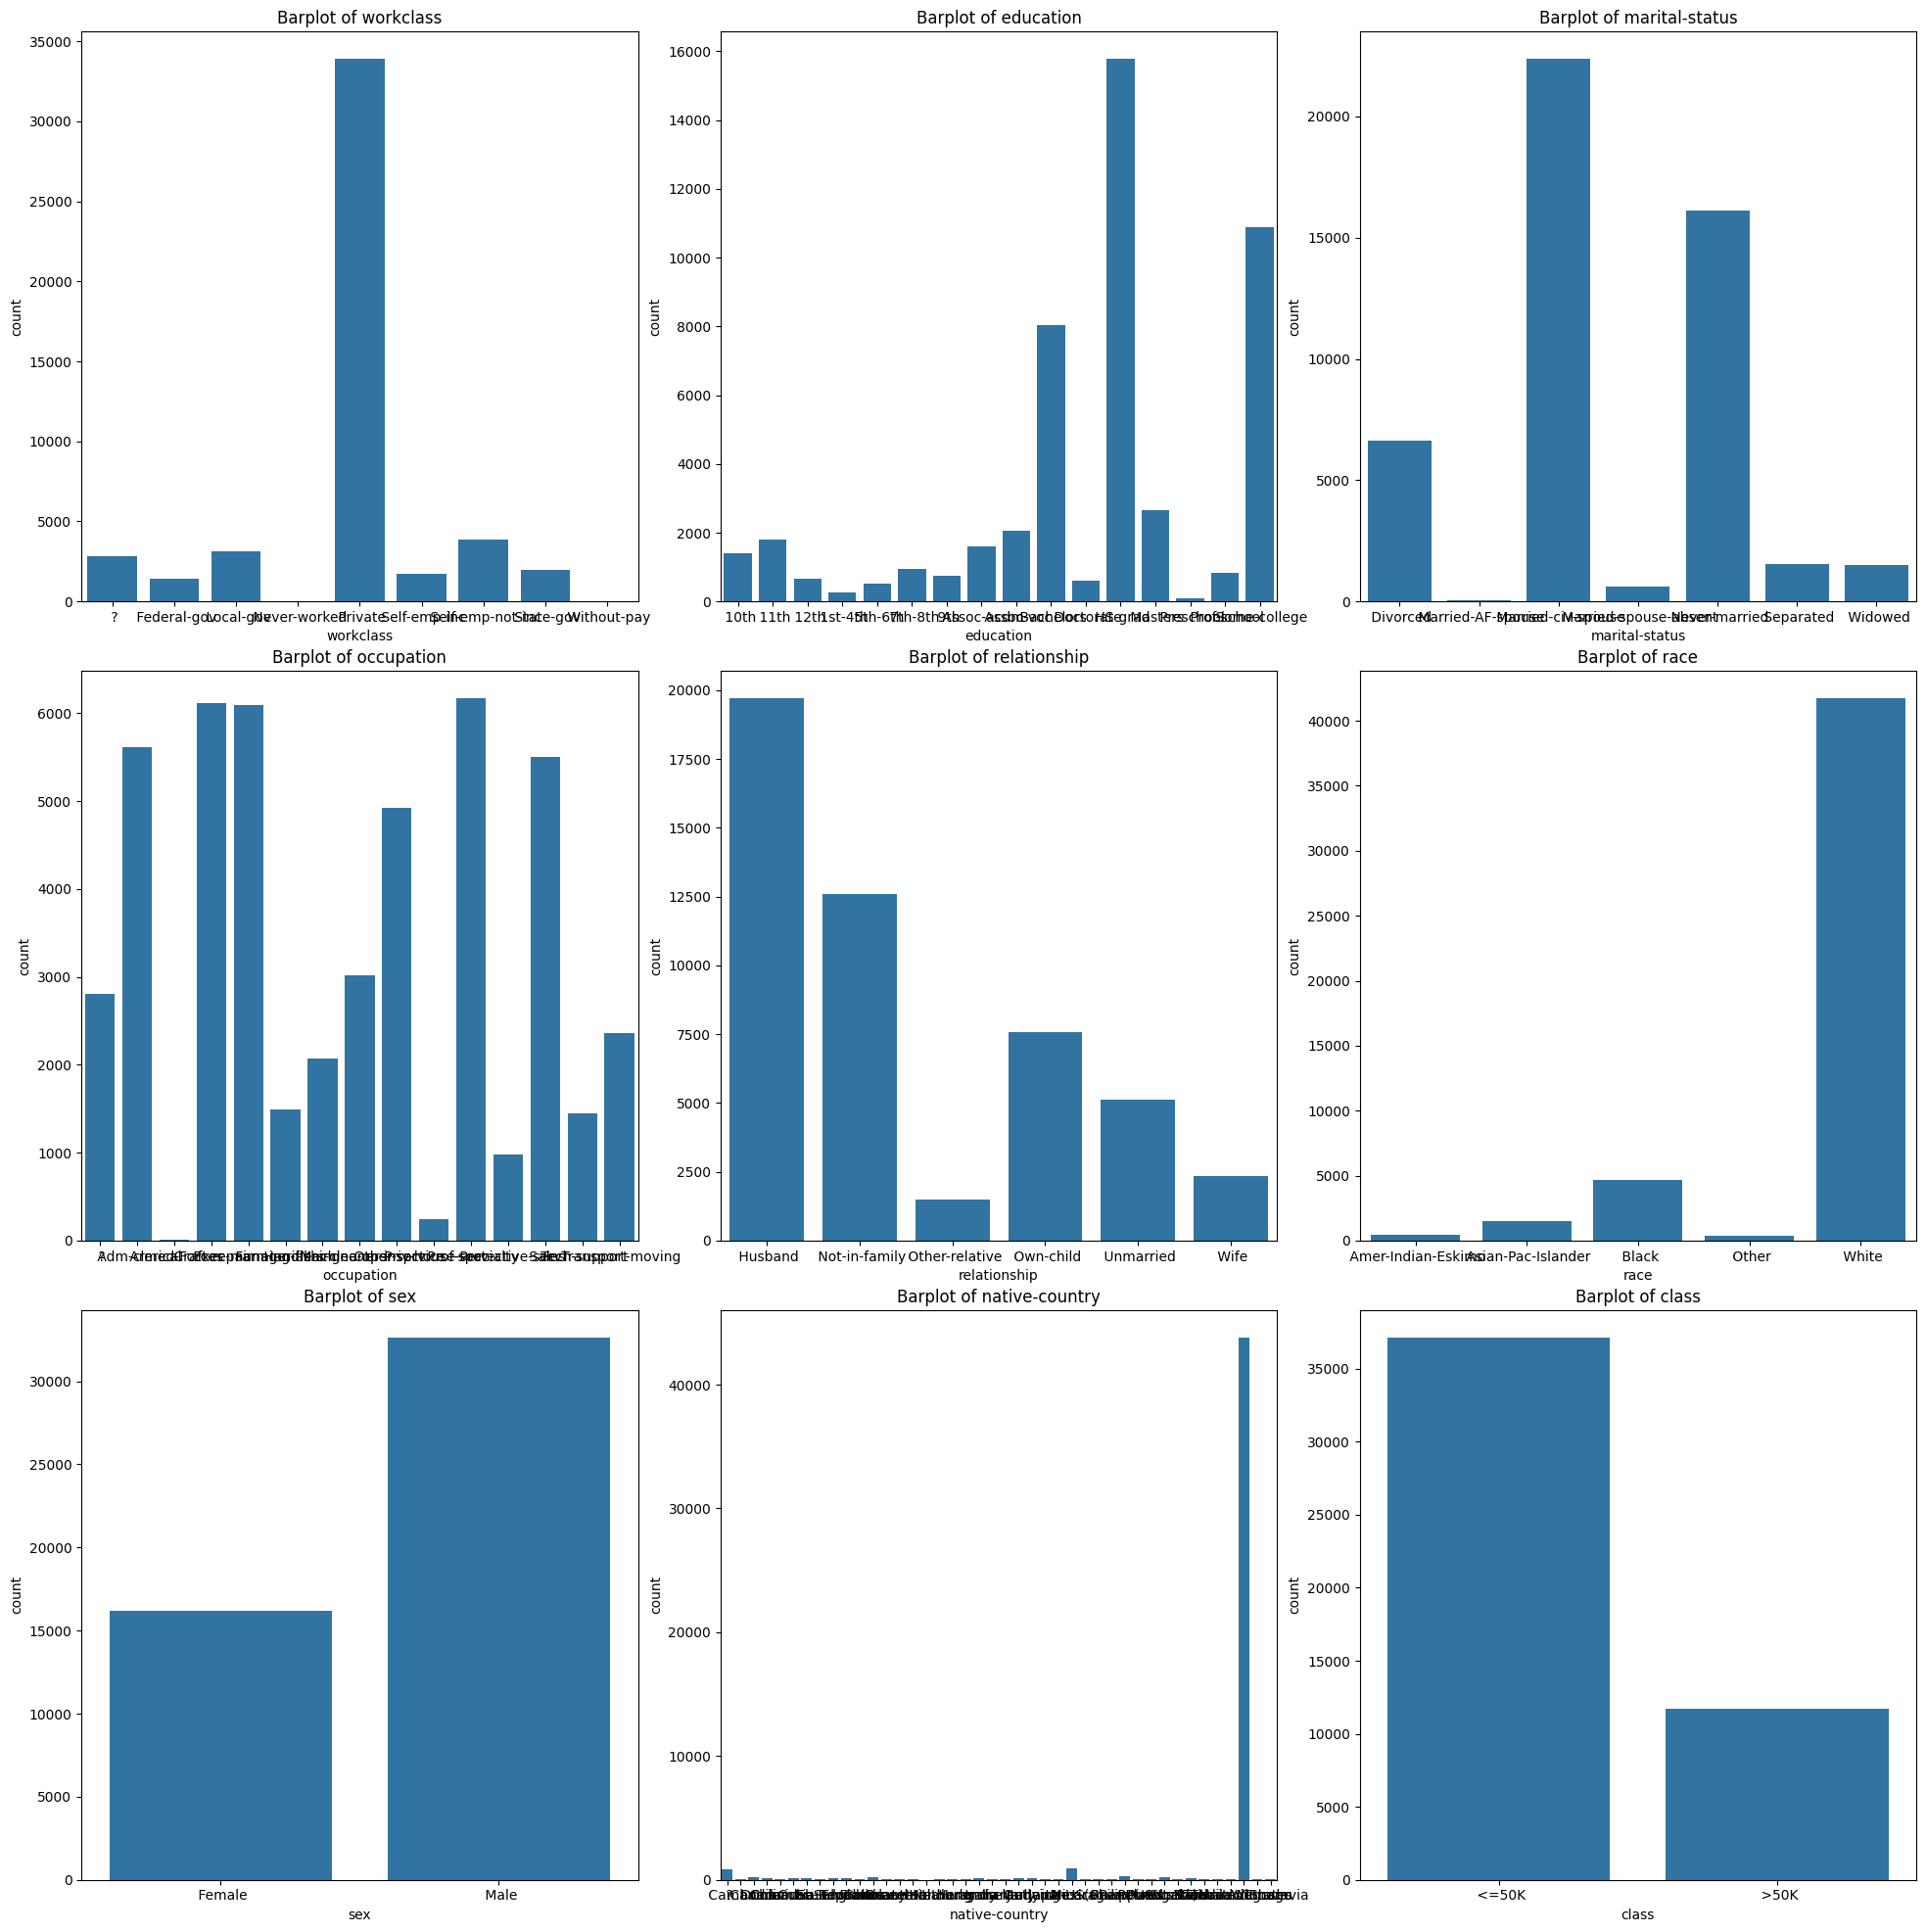

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=3.0)
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
for i in range(3):
    for j in range(3):
        col = columns[i*3+j]
        axs[i][j].set_title(f'Barplot of {col}')
        sns.countplot(data=df, x=col, ax=axs[i][j])

<Axes: xlabel='hours-per-week', ylabel='class'>

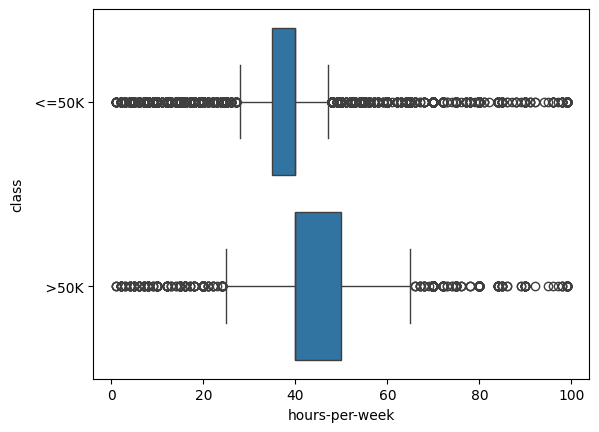

In [34]:
sns.boxplot(data=df, x='hours-per-week', y='class')

<Axes: xlabel='sex', ylabel='hours-per-week'>

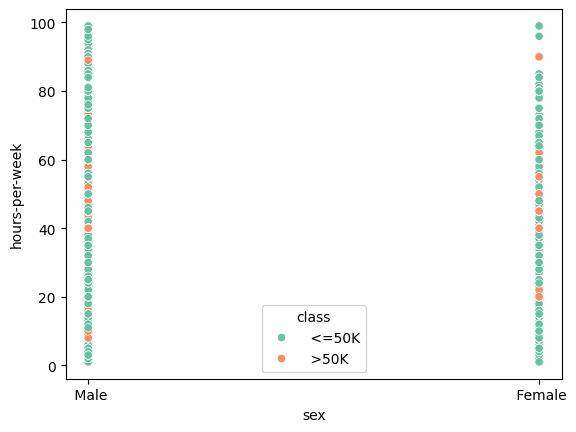

In [38]:
sns.scatterplot(x='sex', y='hours-per-week', hue='class', data=df, palette='Set2')

<Axes: >

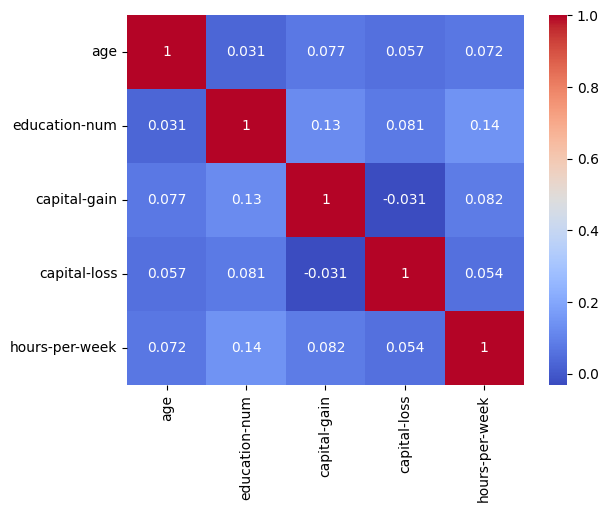

In [39]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='class', ylabel='age'>

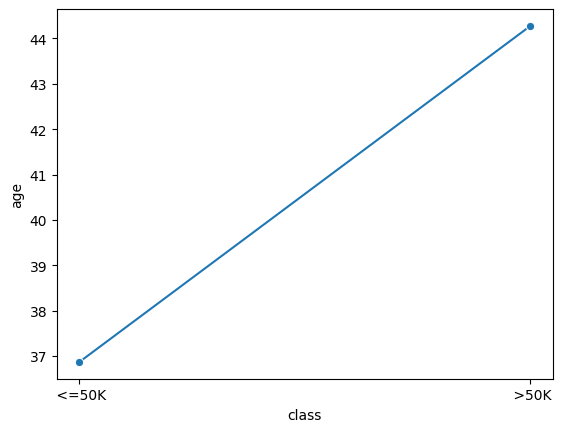

In [41]:
age_income = df.groupby(['class'])['age'].mean().reset_index()
sns.lineplot(data=age_income, x='class', y='age', marker='o')

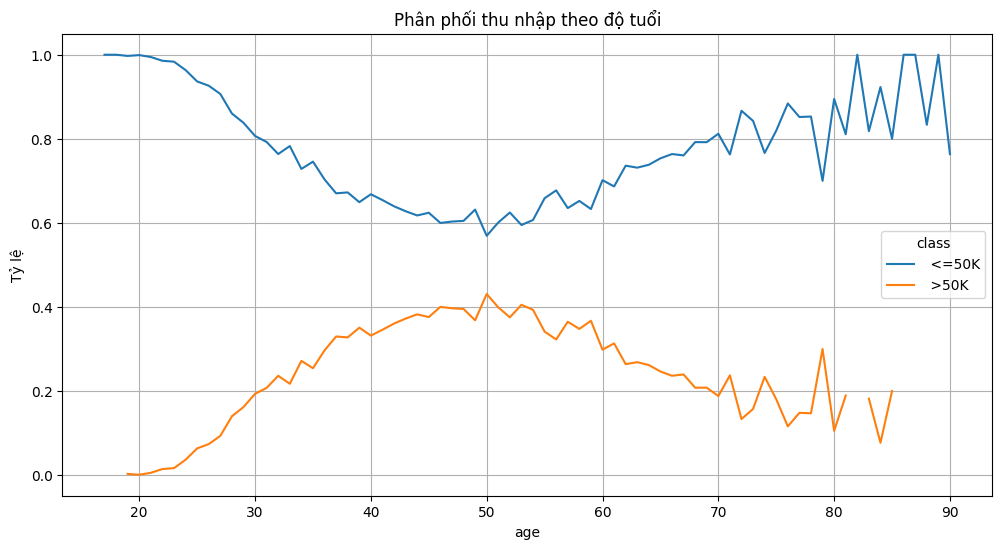

In [44]:
age_income = df.groupby('age')['class'].value_counts(normalize=True).unstack()
age_income.plot(kind='line', figsize=(12,6))
plt.title("Phân phối thu nhập theo độ tuổi")
plt.ylabel("Tỷ lệ")
plt.grid(True)
plt.show()


In [ ]:
res1 = df.loc[(df['class'] == '> 50K') & (df['age'] > 40)]['workclass'].count()
print(f"Number of people with income > 50K and age > 40: {res1}")

Number of people with income > 50K and age > 40: 0


In [71]:
total_per_occ = df.groupby('occupation').size()

rich_per_occ = df[df['class'] == ' >50K'].groupby('occupation').size()

ratio = (rich_per_occ / total_per_occ).sort_values(ascending=False)

ratio = ratio.reset_index()
ratio.columns = ['occupation', 'ratio']
print(ratio)

            occupation     ratio
0      Exec-managerial  0.477818
1       Prof-specialty  0.451069
2         Armed-Forces  0.333333
3      Protective-serv  0.313327
4         Tech-support  0.290456
5                Sales  0.267987
6         Craft-repair  0.226276
7     Transport-moving  0.204246
8         Adm-clerical  0.136874
9    Machine-op-inspct  0.123097
10     Farming-fishing  0.116107
11                   ?  0.094340
12   Handlers-cleaners  0.066602
13       Other-service  0.041438
14     Priv-house-serv  0.012397


In [76]:
sex_income = df.groupby('sex')['class'].value_counts(normalize=False).unstack()
sex_income

class,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918
